In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# follows django database settings format, replace with your own settings
DATABASES = {
    'datafinal':{
        'POSTGRES_DBNAME': 'postgres',
        'POSTGRES_USERNAME': 'postgres',
        'POSTGRES_PASSWORD': 'rootroot',
        'POSTGRES_ADDRESS': 'datafinal.c50h51d04cbn.us-east-2.rds.amazonaws.com',
        'POSTGRES_PORT': 5432,
    },
}

# choose the database to use
db = DATABASES['datafinal']

# construct an engine connection string
engine_string =  ('postgresql+psycopg2://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username= db['POSTGRES_USERNAME'],
                      password= db['POSTGRES_PASSWORD'],
                      ipaddress= db['POSTGRES_ADDRESS'],
                      port= db['POSTGRES_PORT'],
                      dbname= db['POSTGRES_DBNAME'])
               )

# create sqlalchemy engine
engine = create_engine(engine_string)

# read a table from database into pandas dataframe, replace "tablename" with your table name
new_train = pd.read_sql_table('train', engine)
new_train.head()

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,60.0,Business travel,Business,912.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,39.0,23.0,neutral or dissatisfied
1,Male,disloyal Customer,38.0,Business travel,Business,208.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,0.0,0.0,neutral or dissatisfied
2,Male,Loyal Customer,31.0,Business travel,Business,3147.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,0.0,satisfied
3,Male,Loyal Customer,53.0,Business travel,Business,2327.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,3.0,186.0,182.0,neutral or dissatisfied
4,Male,Loyal Customer,30.0,Personal Travel,Eco,650.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,3.0,0.0,0.0,neutral or dissatisfied


In [2]:
# read a table from database into pandas dataframe, replace "tablename" with your table name
new_test = pd.read_sql_table('test', engine)
new_test.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52.0,Business travel,Eco,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,Female,Loyal Customer,36.0,Business travel,Business,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,Male,disloyal Customer,20.0,Business travel,Eco,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44.0,Business travel,Business,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,Female,Loyal Customer,49.0,Business travel,Eco,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [5]:
# Create features for new train
nw_tr = new_train.drop(columns="satisfaction", axis=1)
X_train = pd.get_dummies(nw_tr)

# Create target
y_train0 = new_train["satisfaction"]

X_train

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,60.0,912.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,39.0,23.0,0,1,1,0,1,0,1,0,0
1,38.0,208.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,0.0,0.0,0,1,0,1,1,0,1,0,0
2,31.0,3147.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,0.0,0,1,1,0,1,0,1,0,0
3,53.0,2327.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,3.0,186.0,182.0,0,1,1,0,1,0,1,0,0
4,30.0,650.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,3.0,0.0,0.0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,39.0,3483.0,1.0,1.0,1.0,1.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,0.0,0.0,1,0,1,0,1,0,1,0,0
103590,42.0,3636.0,0.0,5.0,0.0,4.0,2.0,5.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0,0,1,1,0,1,0,1,0,0
103591,64.0,376.0,1.0,5.0,1.0,1.0,2.0,4.0,5.0,4.0,4.0,1.0,4.0,3.0,4.0,4.0,0.0,0.0,1,0,1,0,0,1,0,1,0
103592,57.0,192.0,5.0,5.0,5.0,1.0,2.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,0.0,0.0,1,0,1,0,0,1,0,1,0


In [6]:
# Create features for new test
nw_ts = new_test.drop(columns="satisfaction", axis=1)
X_test = pd.get_dummies(nw_ts)

# Create target
y_test0 = new_test["satisfaction"]

X_test

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52.0,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,1,0,1,0,1,0,0,1,0
1,36.0,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,1,0,1,0,1,0,1,0,0
2,20.0,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,0,1,0,1,1,0,0,1,0
3,44.0,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,0,1,1,0,1,0,1,0,0
4,49.0,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,34.0,526.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,0,1,0,1,1,0,1,0,0
25889,23.0,646.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,0,1,1,0,1,0,1,0,0
25890,17.0,828.0,2.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0,1,0,1,0,0,1,0,1,0
25891,14.0,1127.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,0.0,0,1,1,0,1,0,1,0,0


In [7]:
y_train0.describe()

count                      103594
unique                          2
top       neutral or dissatisfied
freq                        58697
Name: satisfaction, dtype: object

In [8]:
y_test0.describe()

count                       25893
unique                          2
top       neutral or dissatisfied
freq                        14528
Name: satisfaction, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#Encode text labels into numerical values
le = LabelEncoder()
y_train = le.fit_transform(y_train0)
y_test = le.fit_transform(y_test0)

In [11]:
# Check the balance of target values
#y_encoded.value_counts()
print(y_train)
print(y_test)

[0 0 1 ... 0 1 0]
[1 1 0 ... 0 1 0]


In [12]:
le.classes_

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [13]:
pd.Series(y_train).value_counts()

0    58697
1    44897
dtype: int64

In [14]:
pd.Series(y_test).value_counts()

0    14528
1    11365
dtype: int64

In [15]:
X_train.count()

Age                                  103594
Flight Distance                      103594
Inflight wifi                        103594
Departure/Arrival_time_convenient    103594
Ease_of_Online booking               103594
Gate_location                        103594
Food_and_drink                       103594
Online boarding                      103594
Seat comfort                         103594
Inflight entertainment               103594
On-board service                     103594
Leg room service                     103594
Baggage handling                     103594
Checkin service                      103594
Inflight service                     103594
Cleanliness                          103594
Departure_Delay_in_Minutes           103594
Arrival_Delay_in_Minutes             103594
Gender_Female                        103594
Gender_Male                          103594
Customer_Loyal Customer              103594
Customer_disloyal Customer           103594
Type_of_Travel_Business travel  

In [16]:
X_train.dtypes

Age                                  float64
Flight Distance                      float64
Inflight wifi                        float64
Departure/Arrival_time_convenient    float64
Ease_of_Online booking               float64
Gate_location                        float64
Food_and_drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure_Delay_in_Minutes           float64
Arrival_Delay_in_Minutes             float64
Gender_Female                          uint8
Gender_Male                            uint8
Customer_Loyal Customer                uint8
Customer_disloyal Customer             uint8
Type_of_Tr

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Train the data
classifier.fit(X_train, y_train)
#print(y_encoded)
#new_train.dtypes


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Predict outcomes for train data set
predictions = classifier.predict(X_test)
df =pd.DataFrame({"Prediction": predictions, "Actual": y_test})
df


,Prediction,Actual
0,0,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
25888,1,0
25889,1,1
25890,0,0
25891,1,1


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7743019348858765

In [21]:
df["Actual"].value_counts()

0    14528
1    11365
Name: Actual, dtype: int64

In [22]:
# import the confusion_matrix, which is the table of 
# true positives, false positives, true negatives, and false negatives.

from sklearn.metrics import confusion_matrix
c_matrix =confusion_matrix(y_test, predictions)
print(c_matrix)

[[11531  2997]
 [ 2847  8518]]


In [23]:
# Scikitlearn's classification_report calculates the metrics of the model
# Precision = TP/(TP + FP),  recall (sensitivity) TP/(TP + FN)
# F1 = 2(Precision * Sensitivity)/(Precision + Sensitivity)
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     14528
           1       0.74      0.75      0.74     11365

    accuracy                           0.77     25893
   macro avg       0.77      0.77      0.77     25893
weighted avg       0.77      0.77      0.77     25893



LogisticRegression


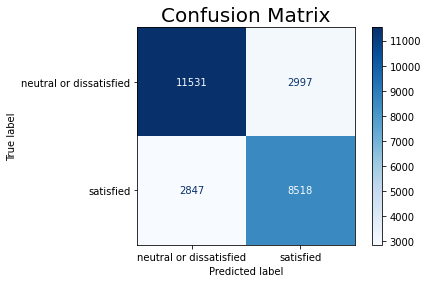

In [24]:
# plot for confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("LogisticRegression")
plot_confusion_matrix(classifier, X_test, y_test,cmap="Blues",values_format="d",display_labels=["neutral or dissatisfied", "satisfied"])
plt.title("Confusion Matrix", fontsize=20)
plt.grid(b=False)
plt.show()

<Figure size 432x432 with 0 Axes>

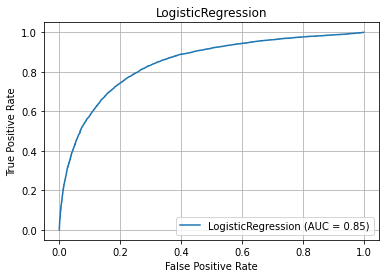

In [25]:
# plot receiver operating characteristic (ROC) curve and detection error tradeoff (DET) curves
# A ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system 
# as its discrimination threshold is varied. 
# The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) 
# at various threshold settings. The true-positive rate is also known as sensitivity, recall.

from sklearn import datasets, metrics, model_selection
from sklearn.metrics import plot_roc_curve


fig = plt.figure(figsize=(6, 6))

lr_roc = plot_roc_curve(classifier, X_test, y_test)

plt.title('LogisticRegression')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC



In [27]:
RFClassifier = RandomForestClassifier(max_depth=5, n_estimators=10,max_features=1)
RFClassifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
RFClassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
rf_predictions = RFClassifier.predict(X_test)
rf_df =pd.DataFrame({"Prediction": rf_predictions, "Actual": y_test})
rf_df

,Prediction,Actual
0,0,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
25888,0,0
25889,1,1
25890,0,0
25891,0,1


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf_predictions)

0.8635538562545861

In [31]:
# import the confusion_matrix, which is the table of 
# true positives, false positives, true negatives, and false negatives.

from sklearn.metrics import confusion_matrix
rf_c_matrix =confusion_matrix(y_test, rf_predictions)
print(rf_c_matrix)

[[13908   620]
 [ 2913  8452]]


In [32]:
# Scikitlearn's classification_report calculates the metrics of the model
# Precision = TP/(TP + FP),  recall (sensitivity) TP/(TP + FN)
# F1 = 2(Precision * Sensitivity)/(Precision + Sensitivity)
from sklearn.metrics import classification_report
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     14528
           1       0.93      0.74      0.83     11365

    accuracy                           0.86     25893
   macro avg       0.88      0.85      0.86     25893
weighted avg       0.87      0.86      0.86     25893



RandomForestClassifier


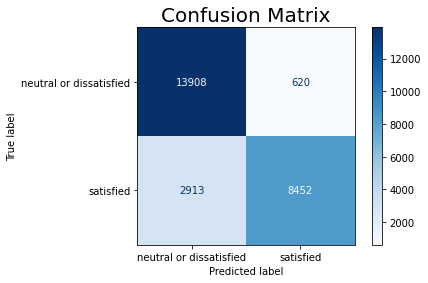

In [33]:
# plot for confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("RandomForestClassifier")
plot_confusion_matrix(RFClassifier, X_test, y_test,cmap="Blues",values_format="d",display_labels=["neutral or dissatisfied", "satisfied"])
plt.title("Confusion Matrix", fontsize=20)
plt.grid(b=False)
plt.show()

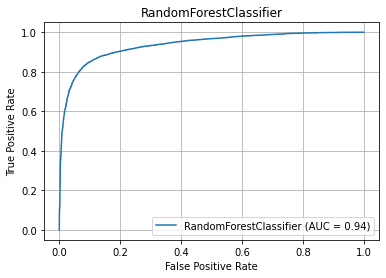

In [34]:
# plot receiver operating characteristic (ROC) curve and detection error tradeoff (DET) curves
# A ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system 
# as its discrimination threshold is varied. 
# The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) 
# at various threshold settings. The true-positive rate is also known as sensitivity, recall.

from sklearn import datasets, metrics, model_selection
from sklearn.metrics import plot_roc_curve

RF_roc =plot_roc_curve(RFClassifier, X_test, y_test)

plt.title('RandomForestClassifier')
plt.grid(True)
plt.legend()
plt.show()

In [35]:
SVMClassifier = make_pipeline(StandardScaler(), LinearSVC(C=0.025))
SVMClassifier

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=0.025, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [36]:
SVMClassifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=0.025, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [37]:
svm_predictions = SVMClassifier.predict(X_test)
svm_df =pd.DataFrame({"Prediction": svm_predictions, "Actual": y_test})
svm_df

,Prediction,Actual
0,1,1
1,1,1
2,0,0
3,0,1
4,0,1
...,...,...
25888,0,0
25889,1,1
25890,0,0
25891,1,1


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_predictions)

0.8706986444212722

In [39]:
# import the confusion_matrix, which is the table of 
# true positives, false positives, true negatives, and false negatives.

from sklearn.metrics import confusion_matrix
svm_c_matrix =confusion_matrix(y_test, svm_predictions)
print(svm_c_matrix)

[[13110  1418]
 [ 1930  9435]]


In [40]:
# Scikitlearn's classification_report calculates the metrics of the model
# Precision = TP/(TP + FP),  recall (sensitivity) TP/(TP + FN)
# F1 = 2(Precision * Sensitivity)/(Precision + Sensitivity)
from sklearn.metrics import classification_report
svm_report = classification_report(y_test, svm_predictions)
print(svm_report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893



SupportVectorMachine


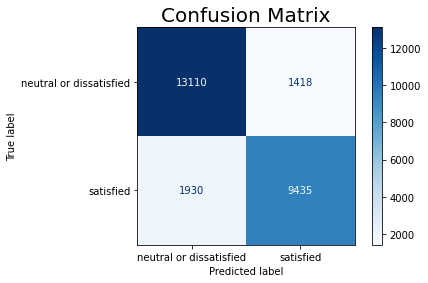

In [41]:
# plot for confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("SupportVectorMachine")
plot_confusion_matrix(SVMClassifier, X_test, y_test,cmap="Blues",values_format="d",display_labels=["neutral or dissatisfied", "satisfied"])
plt.title("Confusion Matrix", fontsize=20)
plt.grid(b=False)
plt.show()

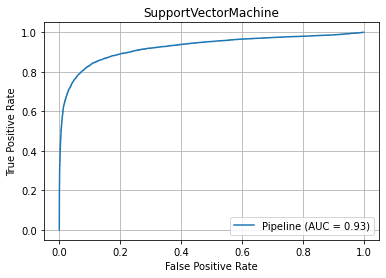

In [42]:
# plot receiver operating characteristic (ROC) curve and detection error tradeoff (DET) curves
# A ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system 
# as its discrimination threshold is varied. 
# The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) 
# at various threshold settings. The true-positive rate is also known as sensitivity, recall.

from sklearn import datasets, metrics, model_selection
from sklearn.metrics import plot_roc_curve

svm_roc = plot_roc_curve(SVMClassifier, X_test, y_test)

plt.title('SupportVectorMachine')
plt.grid(True)
plt.legend()
plt.show()

In [43]:
# confusion_matrix for all three models
print('LogisticRegression   : ' + str(accuracy_score(y_test, predictions)))
print('RandomForestlassifier: ' + str(accuracy_score(y_test, rf_predictions)))
print('SupportVectorMachine : ' + str(accuracy_score(y_test, svm_predictions)))


LogisticRegression   : 0.7743019348858765
RandomForestlassifier: 0.8635538562545861
SupportVectorMachine : 0.8706986444212722


In [44]:
# confusion_matrix for all three models

print('LogisticRegression \n ' + str(c_matrix))
print('\nRandomForestlassifier\n ' + str(rf_c_matrix))
print('\nSupportVectorMachine\n '+ str(svm_c_matrix))

LogisticRegression 
 [[11531  2997]
 [ 2847  8518]]

RandomForestlassifier
 [[13908   620]
 [ 2913  8452]]

SupportVectorMachine
 [[13110  1418]
 [ 1930  9435]]


In [45]:
# confusion_matrix for all three models

print('LogisticRegression \n\n ' + str(report))
print('\nRandomForestlassifier\n\n ' + str(rf_report))
print('\nSupportVectorMachine\n\n '+ str(svm_report))

LogisticRegression 

               precision    recall  f1-score   support

           0       0.80      0.79      0.80     14528
           1       0.74      0.75      0.74     11365

    accuracy                           0.77     25893
   macro avg       0.77      0.77      0.77     25893
weighted avg       0.77      0.77      0.77     25893


RandomForestlassifier

               precision    recall  f1-score   support

           0       0.83      0.96      0.89     14528
           1       0.93      0.74      0.83     11365

    accuracy                           0.86     25893
   macro avg       0.88      0.85      0.86     25893
weighted avg       0.87      0.86      0.86     25893


SupportVectorMachine

               precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
wei

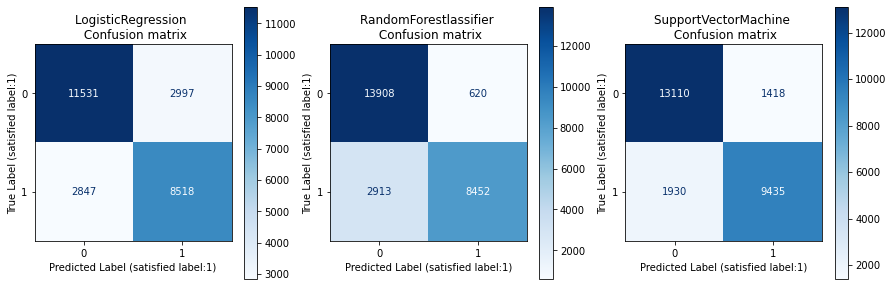

In [46]:
# prepare plots
fig, [ax_lrcm, ax_rfcm, ax_svmcm] = plt.subplots(1, 3, figsize=(15, 5))
plot_confusion_matrix(classifier, X_test, y_test,cmap="Blues",values_format="d", ax=ax_lrcm)
plot_confusion_matrix(RFClassifier, X_test, y_test,cmap="Blues",values_format="d", ax=ax_rfcm)
plot_confusion_matrix(SVMClassifier, X_test, y_test,cmap="Blues",values_format="d", ax=ax_svmcm)

ax_lrcm.set_title('LogisticRegression \n Confusion matrix')
ax_rfcm.set_title('RandomForestlassifier \n Confusion matrix')
ax_svmcm.set_title('SupportVectorMachine \n Confusion matrix')

ax_lrcm.set_xlabel("Predicted Label (satisfied label:1)")
ax_lrcm.set_ylabel("True Label (satisfied label:1)")
ax_rfcm.set_xlabel("Predicted Label (satisfied label:1)")
ax_rfcm.set_ylabel("True Label (satisfied label:1)")
ax_svmcm.set_xlabel("Predicted Label (satisfied label:1)")
ax_svmcm.set_ylabel("True Label (satisfied label:1)")
plt.show()

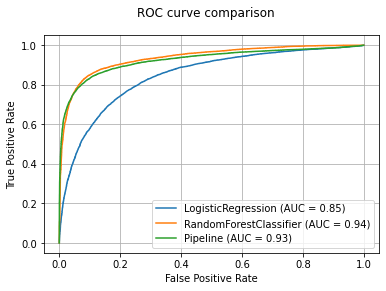

In [47]:
# prepare plots

LR_roc = plot_roc_curve(classifier, X_test, y_test)
RF_roc =plot_roc_curve(RFClassifier, X_test, y_test, ax=LR_roc.ax_)
svm_roc = plot_roc_curve(SVMClassifier, X_test, y_test, ax=LR_roc.ax_)

svm_roc.figure_.suptitle("ROC curve comparison")
plt.grid(True)
plt.legend()
plt.show()

**Ranked Feature Importance**

In [48]:
# Create a random forest classifier.
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [49]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [50]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 1, 0])

In [51]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.02826307, 0.02863505, 0.13676148, 0.01312367, 0.03662509,
       0.0141644 , 0.01016762, 0.159295  , 0.04592484, 0.06153869,
       0.0284209 , 0.02874586, 0.02450001, 0.02380083, 0.02244442,
       0.02502267, 0.01036198, 0.01182543, 0.0030441 , 0.00280487,
       0.02796065, 0.02385005, 0.04533737, 0.06838494, 0.07224469,
       0.04374933, 0.003003  ])

In [52]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)

[(0.15929500431165558, 'Online boarding'),
 (0.13676147985094148, 'Inflight wifi'),
 (0.072244692098048, 'Class_Business'),
 (0.06838494054690096, 'Type_of_Travel_Personal Travel'),
 (0.06153868785641534, 'Inflight entertainment'),
 (0.04592483768303698, 'Seat comfort'),
 (0.04533737186147056, 'Type_of_Travel_Business travel'),
 (0.04374932512448538, 'Class_Eco'),
 (0.03662509158304051, 'Ease_of_Online booking'),
 (0.02874586108900998, 'Leg room service'),
 (0.028635045558397545, 'Flight Distance'),
 (0.02842090231455289, 'On-board service'),
 (0.028263070792051467, 'Age'),
 (0.027960647107687617, 'Customer_Loyal Customer'),
 (0.025022669389360742, 'Cleanliness'),
 (0.024500007712100577, 'Baggage handling'),
 (0.02385004677732012, 'Customer_disloyal Customer'),
 (0.023800829785121175, 'Checkin service'),
 (0.022444421724469334, 'Inflight service'),
 (0.014164403146082003, 'Gate_location'),
 (0.013123672400594607, 'Departure/Arrival_time_convenient'),
 (0.011825427422646573, 'Arrival_De

**Feature Correlation**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [54]:
# Create dataframes
df_airline = pd.read_csv('airline.csv')
df_airline.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [55]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer                           129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type_of_Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi                      129880 non-null  int64  
 7   Departure/Arrival_time_convenient  129880 non-null  int64  
 8   Ease_of_Online booking             129880 non-null  int64  
 9   Gate_location                      129880 non-null  int64  
 10  Food_and_drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [56]:
#Checking the missing values in the dataset
df_airline.isnull().sum()

Gender                                 0
Customer                               0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi                          0
Departure/Arrival_time_convenient      0
Ease_of_Online booking                 0
Gate_location                          0
Food_and_drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

In [57]:
#Transpose and obtain descriptive statistics of dataset
df_airline.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival_time_convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease_of_Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate_location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food_and_drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [58]:
[df_airline.columns[1]]

['Customer ']

In [59]:
# Feature Importance
# label encoder's fit_transform() method is used to first train the label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_airline = df_airline.copy()
df_airline['Gender'] = le.fit_transform(df_airline['Gender'])
df_airline['Customer '] = le.fit_transform(df_airline['Customer '])
df_airline['satisfaction'] = le.fit_transform(df_airline[ 'satisfaction'])
df_airline.head(10)

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
5,0,0,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,0
6,1,0,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,0
7,0,0,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,1
8,0,0,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,0
9,1,1,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,0


In [60]:
[df_airline.columns[4]]

['Class']

In [61]:
#Create a function to convert class from categorical variable to numerical
def clas(string):
    if string == 'Business': return 2
    elif string =='Eco Plus': return 1
    else: return 0

df_airline['ClassN'] =df_airline['Class'].apply(clas) 

In [62]:
#Create a function to convert type_of_travel from categorical variable to numerical
def tot(string):
    if string == 'Business travel': return 1
    else: return 0

df_airline['Type_of_TravelN'] =df_airline['Type_of_Travel'].apply(tot) 

In [63]:
df_airline.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,ClassN,Type_of_TravelN
0,1,0,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0
1,1,1,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,2,1
2,0,0,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,2,1
3,0,0,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,2,1
4,1,0,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,2,1


In [64]:
[df_airline.columns[3]]

['Type_of_Travel']

In [65]:
#Drop the type_of_travel categorical column and keep the newly created Type_of_TravelN numerical column
df_airline.drop('Type_of_Travel',inplace=True,axis=1)

In [66]:
#Drop the class categorical column and keep the newly created ClassN numerical column
df_airline.drop('Class',inplace=True,axis=1)

<function matplotlib.pyplot.tight_layout>

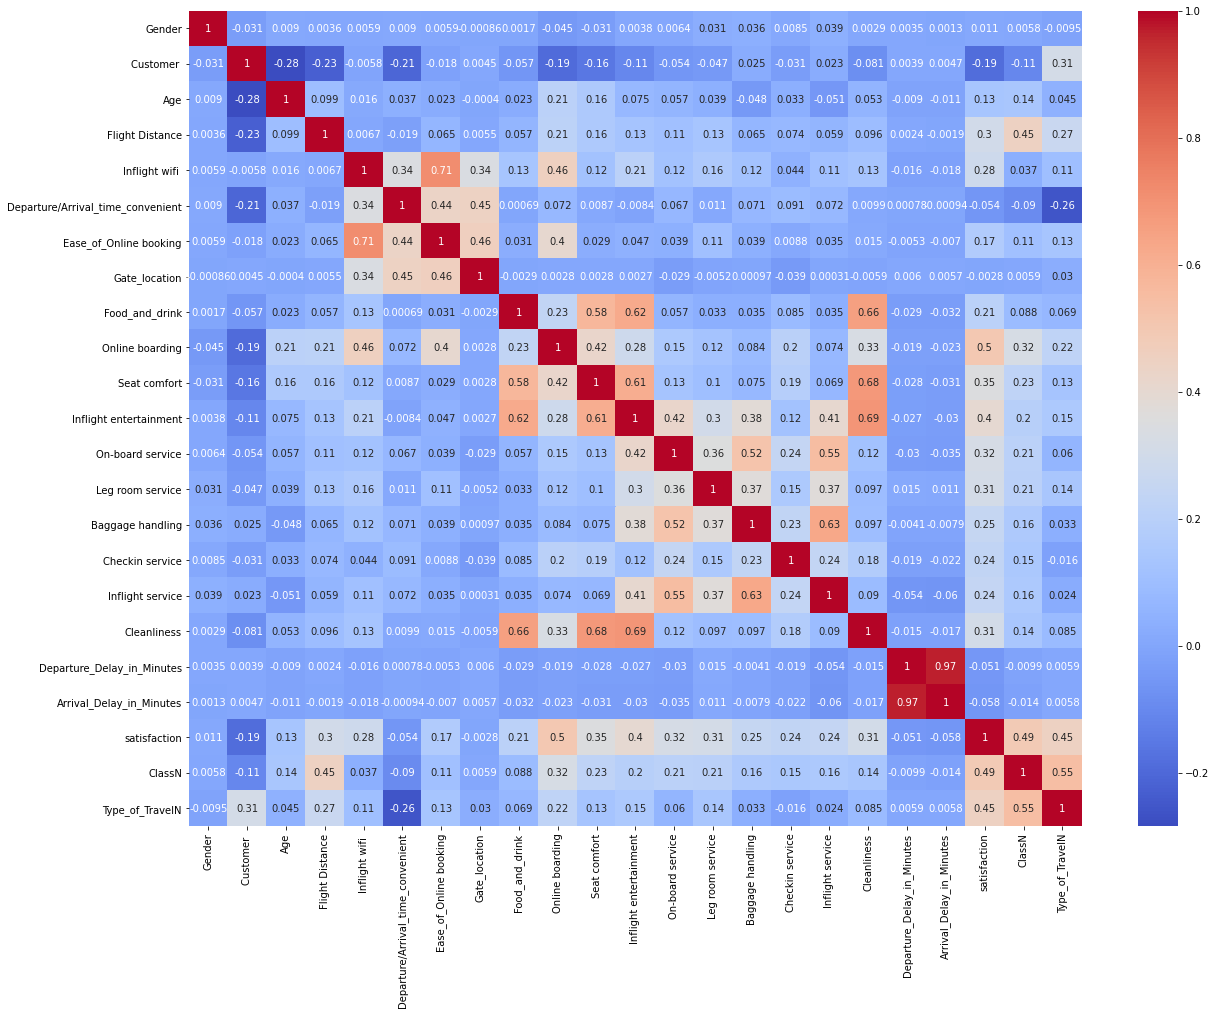

In [67]:
#heatmap of correlation with numerical variables including satisfactioN
plt.figure(figsize=(20,15))
sns.heatmap(df_airline.corr(),annot=True,cmap='coolwarm')
plt.tight_layout

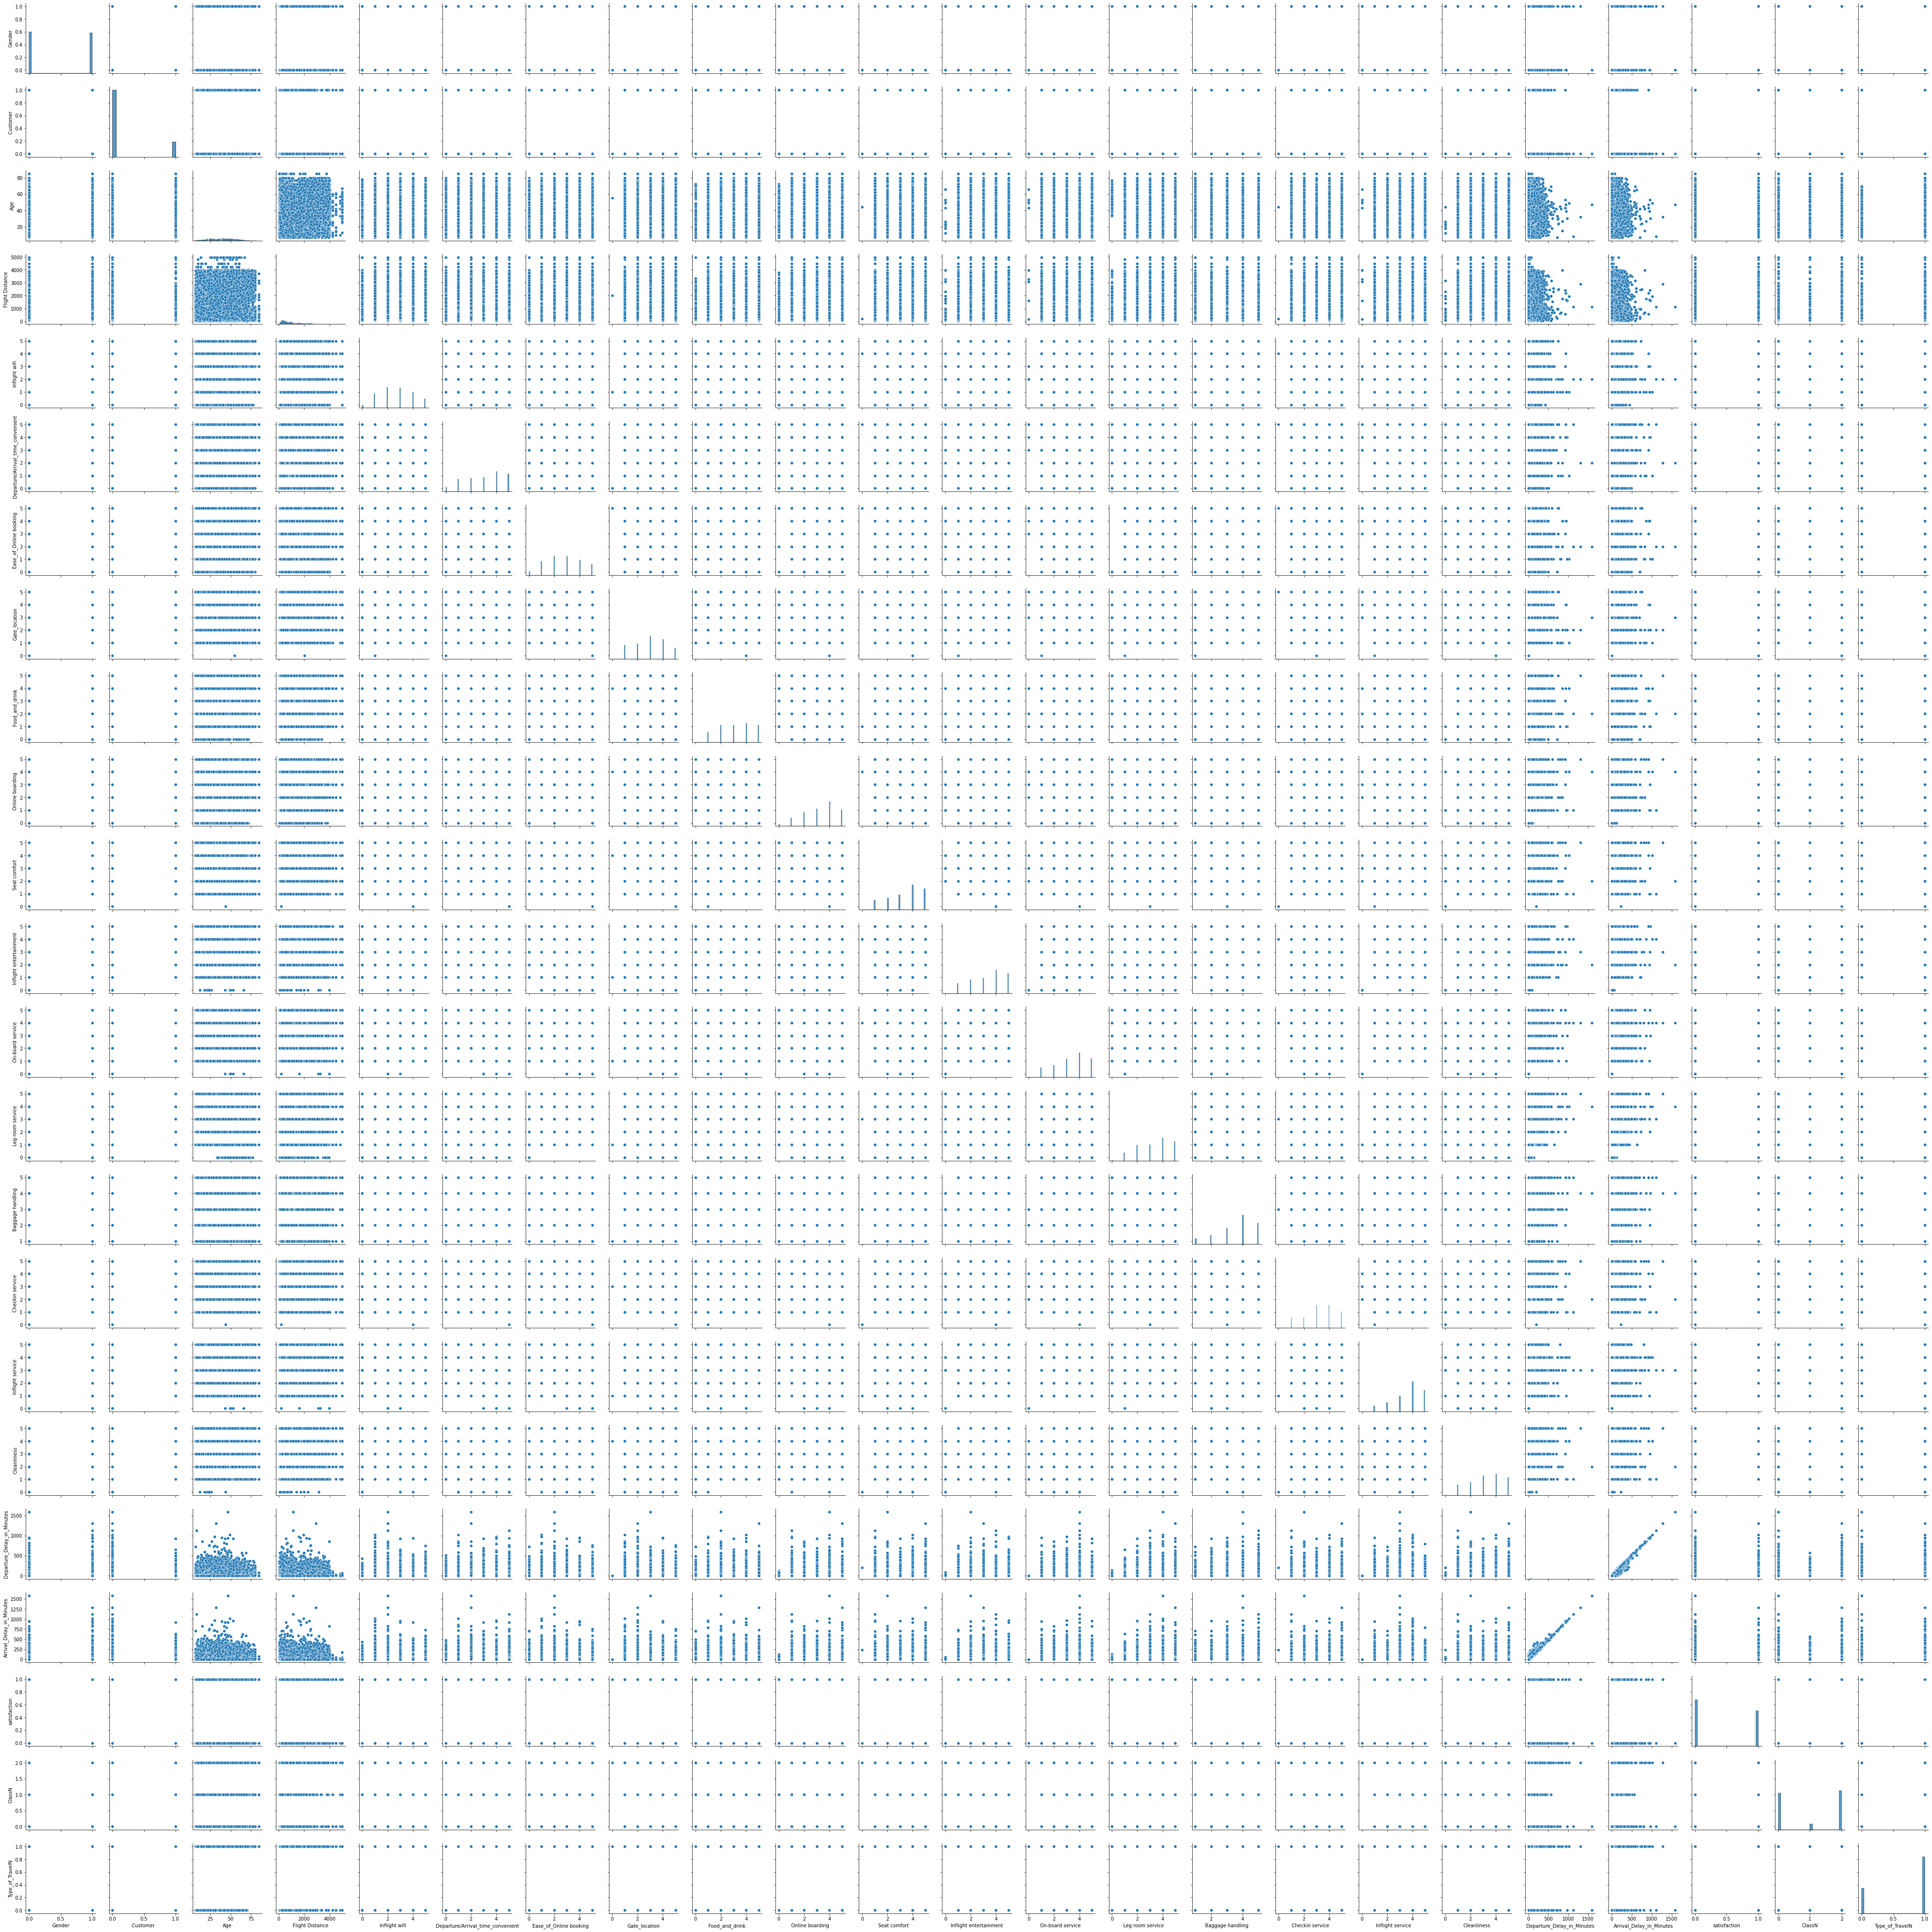

In [71]:
sns.pairplot(df_airline)

In [ ]:
#sns.pairplot(df_airline, kind="reg")

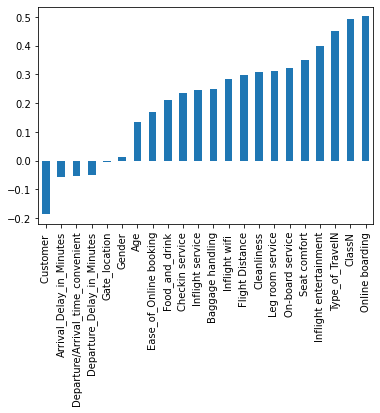

In [70]:
#Rank features from highest to lowest correlation with outcome variable of satisfactioN
df_airline.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')